<a href="https://colab.research.google.com/github/AkhilaGuptaP/ML_Capstone/blob/main/Draft2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To filter and suppress warning messages issued by code. The purpose is to prevent warning messages from cluttering the console or logs.
import warnings
warnings.filterwarnings('ignore')


# Tells to render Matplotlib plots as static images directly within the notebook itself
%matplotlib inline

Dataset Loading

In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
Insurance_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Module6(ML)/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION (1).csv')

Dataset First View

In [ ]:
# Dataset First Look
Insurance_df.head(10).T

,0,1,2,3,4,5,6,7,8,9
id,1,2,3,4,5,6,7,8,9,10
Gender,Male,Male,Male,Male,Female,Female,Male,Female,Female,Female
Age,44,76,47,21,29,24,23,56,24,32
Driving_License,1,1,1,1,1,1,1,1,1,1
Region_Code,28.0,3.0,28.0,11.0,41.0,33.0,11.0,28.0,3.0,6.0
Previously_Insured,0,0,0,1,1,0,0,0,1,1
Vehicle_Age,> 2 Years,1-2 Year,> 2 Years,< 1 Year,< 1 Year,< 1 Year,< 1 Year,1-2 Year,< 1 Year,< 1 Year
Vehicle_Damage,Yes,No,Yes,No,No,Yes,Yes,Yes,No,No
Annual_Premium,40454.0,33536.0,38294.0,28619.0,27496.0,2630.0,23367.0,32031.0,27619.0,28771.0
Policy_Sales_Channel,26.0,26.0,26.0,152.0,152.0,160.0,152.0,26.0,152.0,152.0


In [ ]:
# Dataset Rows & Columns count
print(f'Original dataset has {Insurance_df.shape[0]} Row & {Insurance_df.shape[1]} Columns.')

Original dataset has 381109 Row & 12 Columns.


Dataset Information

In [ ]:
# Dataset Info
Insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicate_count=Insurance_df.duplicated().sum()
print("Dataset duplicate value count is ",duplicate_count)

Dataset duplicate value count is  0


Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
missing_values=Insurance_df.isna().sum()
missing_values

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Data Wrangling Code

In [ ]:
# Converting certain columns to appropriate data types
Insurance_df['Region_Code'] = Insurance_df['Region_Code'].astype(int)
Insurance_df['Policy_Sales_Channel'] = Insurance_df['Policy_Sales_Channel'].astype(int)
Insurance_df['Vintage'] = Insurance_df['Vintage'].astype(int)
Insurance_df['Response'] = Insurance_df['Response'].astype(int)  # Assuming 'Response' should be an integer

**Visualizations**

### **Chart 1: Gender by Driving License Status Count**

<Figure size 2000x700 with 0 Axes>

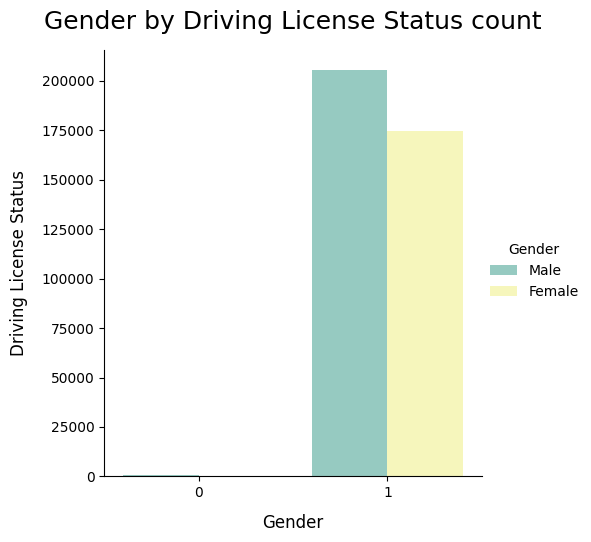

In [ ]:
# Create the plot
plt.figure(figsize=(20, 7))

# Creating Categorical Bar plot
sns.catplot(x="Driving_License", hue="Gender", data=Insurance_df, kind="count",palette="Set3")

#Adding labels and title to the plot
plt.xlabel('Gender',fontsize=12,labelpad=10)
plt.ylabel("Driving License Status", fontsize=12, labelpad=10)
plt.title("Gender by Driving License Status count",fontsize=18,pad=15)

#Show the plot
plt.show()

OR Pie charts seperate

In [ ]:
#Finding count of people who has driving license per Gender
dl_yes=Insurance_df.groupby('Gender')['Driving_License'].apply(lambda x:(x==1).sum()).reset_index(name='dl_count')
dl_yes

,Gender,dl_count
0,Female,174808
1,Male,205489


In [ ]:
dl_no=Insurance_df.groupby('Gender')['Driving_License'].apply(lambda x:(x==0).sum()).reset_index(name='dl_count')
dl_no

,Gender,dl_count
0,Female,212
1,Male,600


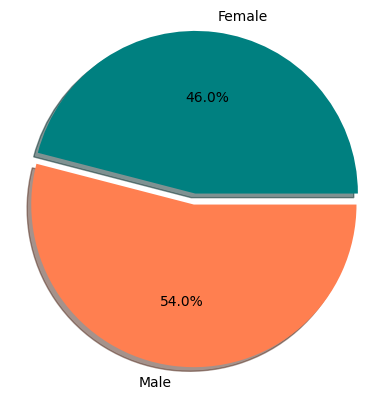

In [ ]:
#fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#Creating pieplot for room types with explode and custom colors
explode_range = [0.025,0.05]
my_colors=['teal','coral']

plt.pie(dl_yes['dl_count'],labels=dl_yes['Gender'],explode=explode_range,autopct='%1.1f%%',shadow=True,colors=my_colors,radius=1.1)
plt.show()



### **Chart2: Count of people per each region code**

In [ ]:
#Just displaying the count

region_per_count=Insurance_df.groupby('Region_Code')['id'].count().reset_index(name='total_count')
region_per_count.sort_values('total_count',ascending=False,inplace=True)
region_per_count.head()

,Region_Code,total_count
28,28,106415
8,8,33877
46,46,19749
41,41,18263
15,15,13308


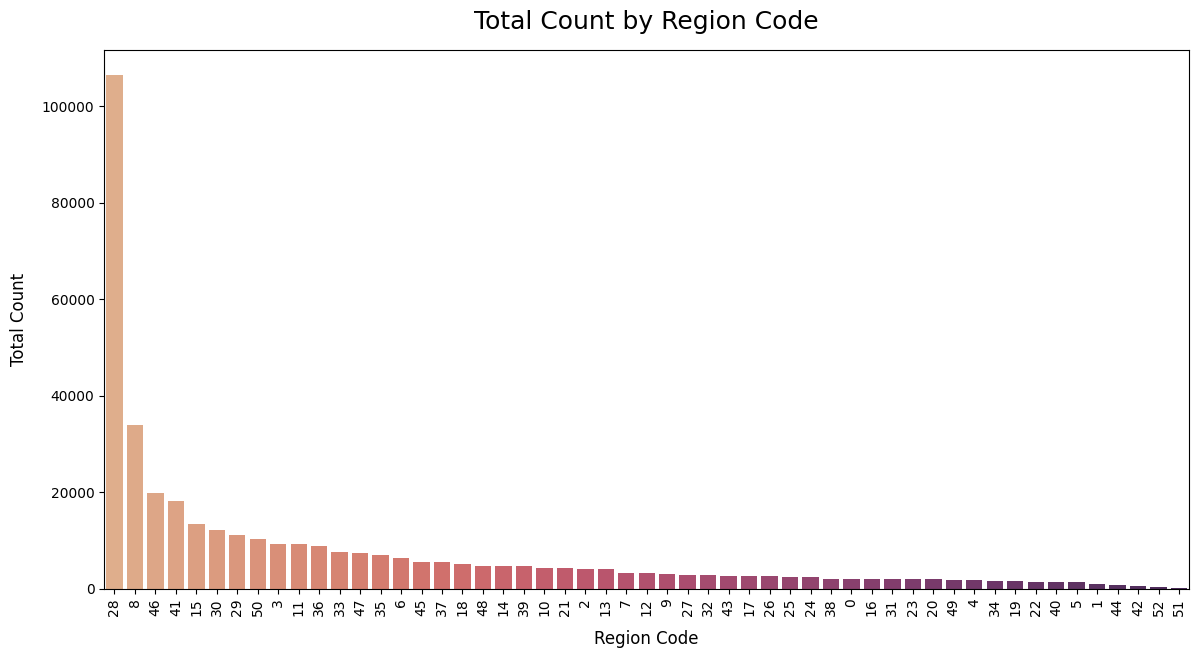

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=Insurance_df,x='Region_Code',order=Insurance_df['Region_Code'].value_counts().index,palette='flare')

#Adding labels and title to the plot
plt.xlabel('Region Code',fontsize=12,labelpad=10)
plt.ylabel("Total Count", fontsize=12, labelpad=10)
plt.title("Total Count by Region Code",fontsize=18,pad=15)

#Rotating the X axis legends
plt.xticks(rotation=90)

#Show the plot
plt.show()

### **Chart3 : Count of vehicles wrt age and hue as damage**

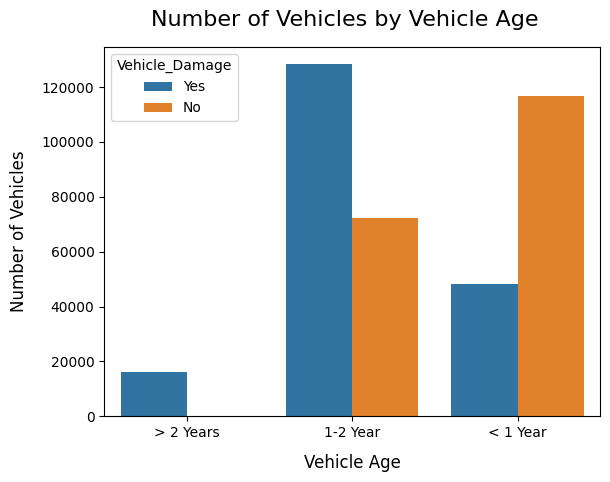

In [ ]:
#Create a count plot
sns.countplot(data=Insurance_df,x='Vehicle_Age',hue='Vehicle_Damage')

#Adding labels and title to the plot
plt.xlabel('Vehicle Age',fontsize=12,labelpad=10)
plt.ylabel("Number of Vehicles", fontsize=12, labelpad=10)
plt.title("Number of Vehicles by Vehicle Age  ",fontsize=16,pad=15)

#Show the plot
plt.show()

### **chart4: Vehicle age vs Premium average**

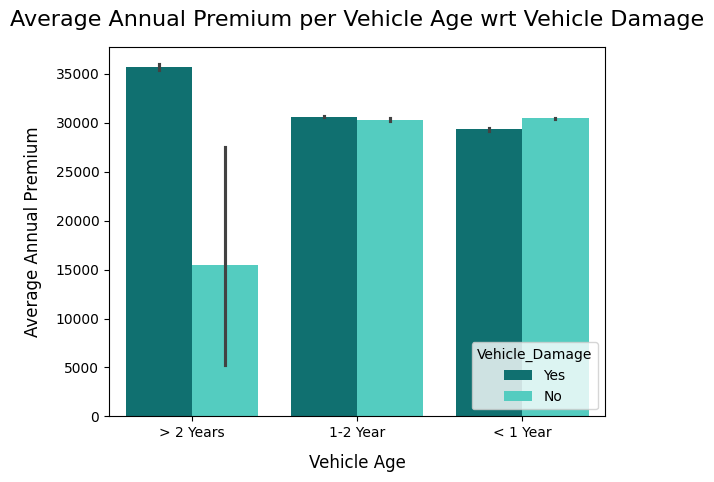

In [ ]:
#Create a barplot
sns.barplot(data=Insurance_df,x='Vehicle_Age',y='Annual_Premium',hue='Vehicle_Damage',palette={'Yes':'Teal','No':'Turquoise'})

#Adding labels and title to the plot
plt.xlabel('Vehicle Age',fontsize=12,labelpad=10)
plt.ylabel("Average Annual Premium", fontsize=12, labelpad=10)
plt.title("Average Annual Premium per Vehicle Age wrt Vehicle Damage",fontsize=16,pad=15)

#Show the plot
plt.show()

### **Chart 5 : Gender by Previously_insurance and response**

In [ ]:
prev_yes_count=Insurance_df.groupby('Gender')['Previously_Insured'].apply(lambda x:(x==1).sum()).reset_index()
prev_yes_count.rename(columns={'Previously_Insured':'Previously_Insured_YES'},inplace=True)
prev_yes_count

,Gender,Previously_Insured_YES
0,Female,87949
1,Male,86679


In [ ]:
prev_no_count=Insurance_df.groupby('Gender')['Previously_Insured'].apply(lambda x:(x==0).sum()).reset_index()
prev_no_count.rename(columns={'Previously_Insured':'Previously_Insured_NO'},inplace=True)
prev_no_count

,Gender,Previously_Insured_NO
0,Female,87071
1,Male,119410


In [ ]:
response_yes_count=Insurance_df.groupby('Gender')['Response'].apply(lambda x:(x==1).sum()).reset_index()
response_yes_count.rename(columns={'Response':'Response_YES'},inplace=True)
response_yes_count

,Gender,Response_YES
0,Female,18185
1,Male,28525


In [ ]:
response_no_count=Insurance_df.groupby('Gender')['Response'].apply(lambda x:(x==0).sum()).reset_index()
response_no_count.rename(columns={'Response':'Response_NO'},inplace=True)
response_no_count

,Gender,Response_NO
0,Female,156835
1,Male,177564


In [ ]:
#to keep it short, we can rewrite as below
#Merging to get one table with total count of previously insured and response wrt gender
count_result_short=pd.merge(pd.merge(pd.merge(prev_yes_count,prev_no_count,on='Gender'),response_yes_count,on='Gender'),response_no_count,on='Gender')
count_result_short

,Gender,Previously_Insured_YES,Previously_Insured_NO,Response_YES,Response_NO
0,Female,87949,87071,18185,156835
1,Male,86679,119410,28525,177564


In [ ]:
prev_and_res_YES=pd.merge(prev_yes_count,response_yes_count,on='Gender')
prev_and_res_YES

,Gender,Previously_Insured_YES,Response_YES
0,Female,87949,18185
1,Male,86679,28525


In [ ]:
#Reshaping the data using pd.melt to plot comparison
df_melted_YES = pd.melt(prev_and_res_YES, id_vars='Gender', var_name='Yes', value_name='Value')
df_melted_YES

,Gender,Yes,Value
0,Female,Previously_Insured_YES,87949
1,Male,Previously_Insured_YES,86679
2,Female,Response_YES,18185
3,Male,Response_YES,28525


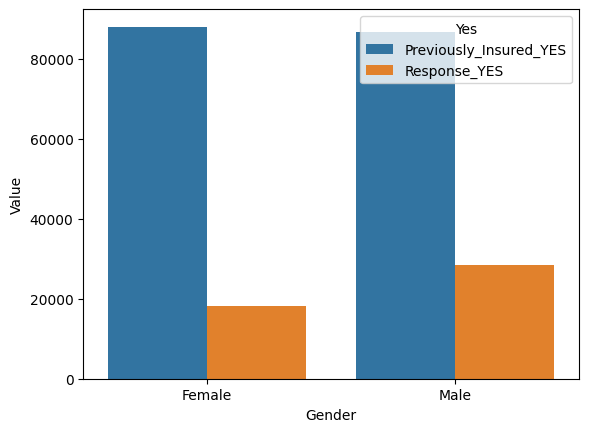

In [ ]:
#Create side-by-side bar plot to compare Previously Insured and Response(Yes)
sns.barplot(data=df_melted_YES,x='Gender',y='Value',hue='Yes')

#Show the plot
plt.show()

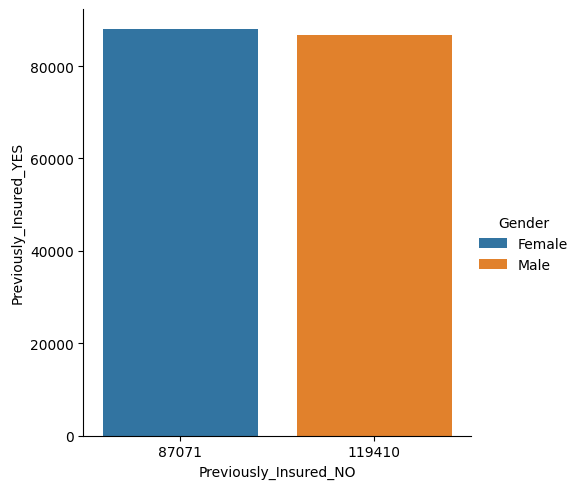

In [ ]:
sns.catplot(data=count_result_short,x='Previously_Insured_NO',y='Previously_Insured_YES',hue='Gender',kind='bar')

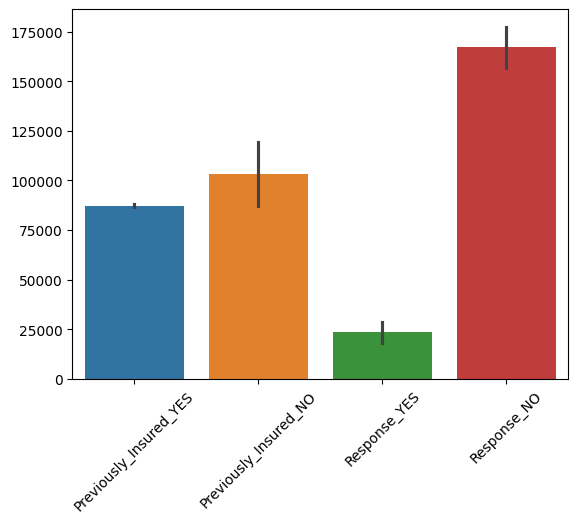

In [ ]:
sns.barplot(data=count_result_short[['Previously_Insured_YES','Previously_Insured_NO','Response_YES','Response_NO']])
plt.xticks(rotation=45)
plt.show()

### **Chart 6: Response(yes_count) per region code**

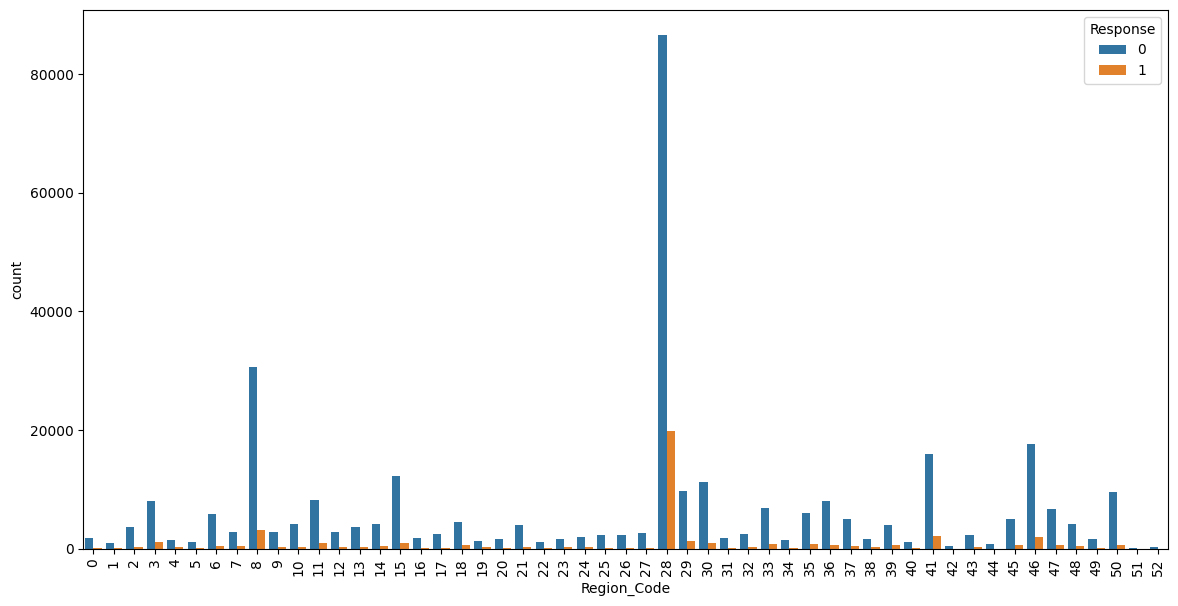

In [ ]:
plt.figure(figsize=(14, 7))
sns.countplot(data=Insurance_df,x='Region_Code',hue='Response')
plt.xticks(rotation=90)
plt.show()

In [ ]:
response_yes_per_region=Insurance_df.groupby('Region_Code')['Response'].apply(lambda x:(x==1).sum()).reset_index(name='Total Yes Response count')

response_yes_per_region.head()

,Region_Code,Total Yes Response count
0,0,174
1,1,109
2,2,287
3,3,1181
4,4,285


In [ ]:
response_yes_per_region.sort_values('Total Yes Response count',ascending=False,inplace=True)
response_yes_per_region.head()

,Region_Code,Total Yes Response count
28,28,19917
8,8,3257
41,41,2224
46,46,2032
29,29,1365


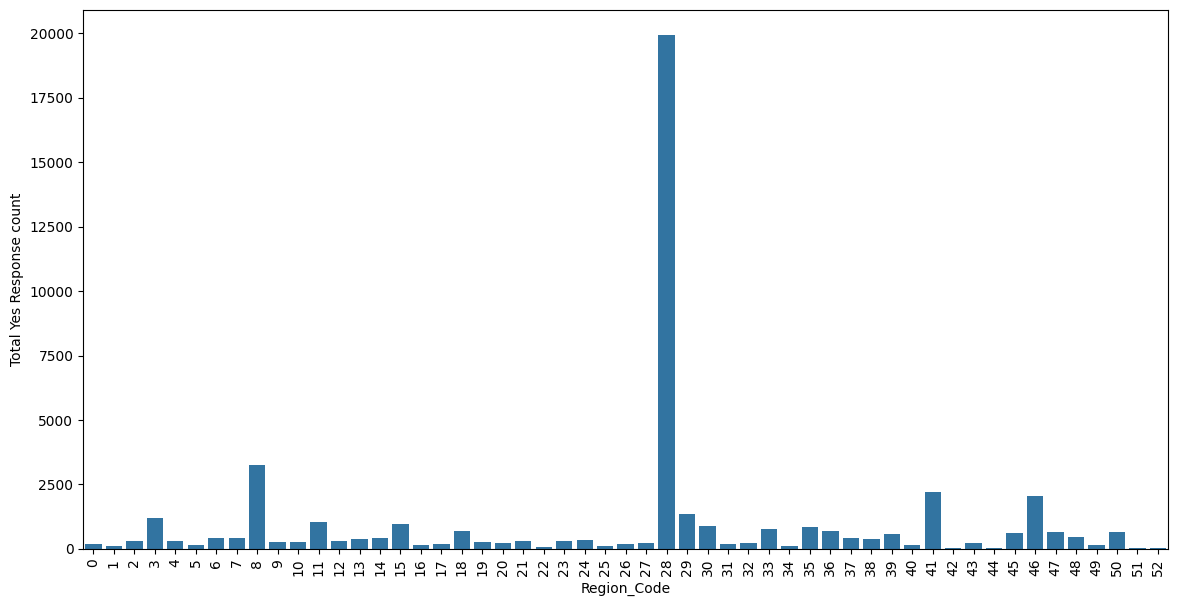

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(data=response_yes_per_region,x='Region_Code',y='Total Yes Response count')
plt.xticks(rotation=90)
plt.show()

### **Chart 7: People age group vs driving license(yes)**

In [ ]:
Insurance_df['Age_Group']=Insurance_df['Age'].apply(lambda x:'Young Age' if x>=20 and x<=45 else 'Middle Age' if x>45 and x<=60 else 'Old Age')
Insurance_df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Age_Group
0,1,Male,44,1,28,0,> 2 Years,Yes,40454.0,26,217,1,Young Age
1,2,Male,76,1,3,0,1-2 Year,No,33536.0,26,183,0,Old Age
2,3,Male,47,1,28,0,> 2 Years,Yes,38294.0,26,27,1,Middle Age
3,4,Male,21,1,11,1,< 1 Year,No,28619.0,152,203,0,Young Age
4,5,Female,29,1,41,1,< 1 Year,No,27496.0,152,39,0,Young Age


In [ ]:
age_dl_yes=Insurance_df.groupby('Age_Group')['Driving_License'].apply(lambda x:(x==1).sum()).reset_index(name='DL_Yes')
age_dl_yes

,Age_Group,DL_Yes
0,Middle Age,80348
1,Old Age,42649
2,Young Age,257300


In [ ]:
age_dl_no=Insurance_df.groupby('Age_Group')['Driving_License'].apply(lambda x:(x==0).sum()).reset_index(name='DL_No')
age_dl_no

,Age_Group,DL_No
0,Middle Age,178
1,Old Age,590
2,Young Age,44


In [ ]:
age_group_dl=pd.merge(age_dl_yes,age_dl_no,on='Age_Group')
age_group_dl

,Age_Group,DL_Yes,DL_No
0,Middle Age,80348,178
1,Old Age,42649,590
2,Young Age,257300,44


In [ ]:
# Reshape the data using pd.melt
df_melted_dl = pd.melt(age_group_dl, id_vars='Age_Group', var_name='DL', value_name='Value')
df_melted_dl

,Age_Group,DL,Value
0,Middle Age,DL_Yes,80348
1,Old Age,DL_Yes,42649
2,Young Age,DL_Yes,257300
3,Middle Age,DL_No,178
4,Old Age,DL_No,590
5,Young Age,DL_No,44


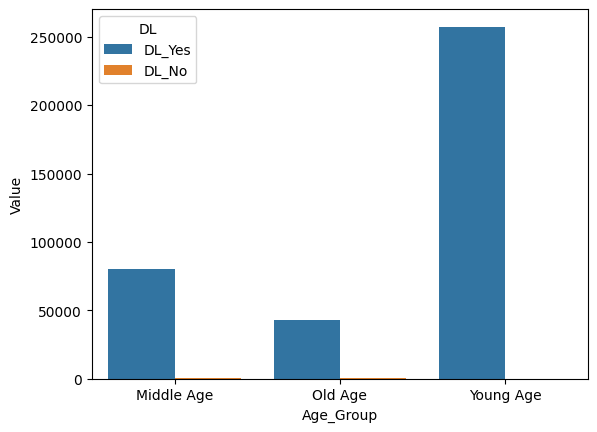

In [ ]:
sns.barplot(data=df_melted_dl,x='Age_Group',y='Value',hue='DL')

plt.show()